# **Navigation/Mount/Env**

In [ ]:
# Enabling TensorFlow 2.0
%tensorflow_version 2.x 

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Project Folder
%cd "gdrive/My Drive/projects/dermo/scripts/"

In [ ]:
# Current Directory
%ls

classification_models/  ensemble-test.ipynb  __pycache__/
color-io.ipynb          ensemble-val.ipynb   train-val.ipynb


In [ ]:
# Libraries
import glob
import numpy as np
import cv2
from skimage import filters as skifilters
from scipy import ndimage
from skimage import filters
import matplotlib.pyplot as plt
import tqdm
from sklearn.utils import shuffle
import pandas as pd
from __future__ import unicode_literals
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
import tensorflow as tf
import os
import h5py
import time
import json
import warnings
import dill
from sklearn.metrics import (roc_curve, auc, accuracy_score, f1_score, precision_score, 
                             recall_score, classification_report, confusion_matrix)
from scipy import interp

# **Children Models**

## **● Load Model Predictions**

In [ ]:
# EfficientNet-B6
E01__train_predictions = np.load('../predictions/E01_train-predx.npy')
E01__train_labels      = np.load('../predictions/E01_train-lablx.npy')
E01__val_predictions   = np.load('../predictions/E01_val-pred.npy')
E01__val_labels        = np.load('../predictions/E01_val-labl.npy')

# Inception-V3
E02__train_predictions = np.load('../predictions/E02_train-predx.npy')
E02__train_labels      = np.load('../predictions/E02_train-lablx.npy')
E02__val_predictions   = np.load('../predictions/E02_val-pred.npy')
E02__val_labels        = np.load('../predictions/E02_val-labl.npy')

# SENet-154
E03__train_predictions = np.load('../predictions/E03_train-predx.npy')
E03__train_labels      = np.load('../predictions/E03_train-lablx.npy')
E03__val_predictions   = np.load('../predictions/E03_val-pred.npy')
E03__val_labels        = np.load('../predictions/E03_val-labl.npy')

# SEResNeXt-101
E04__train_predictions = np.load('../predictions/E04_train-predx.npy')
E04__train_labels      = np.load('../predictions/E04_train-lablx.npy')
E04__val_predictions   = np.load('../predictions/E04_val-pred.npy')
E04__val_labels        = np.load('../predictions/E04_val-labl.npy')

# EfficientNet-B4
E05__train_predictions = np.load('../predictions/E05_train-pred.npy')
E05__train_labels      = np.load('../predictions/E05_train-labl.npy')
E05__val_predictions   = np.load('../predictions/E05_val-pred.npy')
E05__val_labels        = np.load('../predictions/E05_val-labl.npy')

# DenseNet-169
E06__train_predictions = np.load('../predictions/E06_train-predx.npy')
E06__train_labels      = np.load('../predictions/E06_train-lablx.npy')
E06__val_predictions   = np.load('../predictions/E06_val-pred.npy')
E06__val_labels        = np.load('../predictions/E06_val-labl.npy')

# EfficientNet-B6
E07__train_predictions = np.load('../predictions/E07_train-pred.npy')
E07__train_labels      = np.load('../predictions/E07_train-labl.npy')
E07__val_predictions   = np.load('../predictions/E07_val-pred.npy')
E07__val_labels        = np.load('../predictions/E07_val-labl.npy')

## **● Independent Model Performance**

In [ ]:
# Receiver-Operating Characteristics Curve
def ROC(train_predictions,train_labels,val_predictions,val_labels):
  M1_TPRS_train     = []
  M1_AUCS_train     = []
  M1_mean_FPR_train = np.linspace(0, 0.1, 100)
  M1_FPR_train, M1_TPR_train, thresholds = roc_curve(train_labels, train_predictions)
  M1_TPRS_train.append(np.interp(M1_mean_FPR_train, M1_FPR_train, M1_TPR_train))
  M1_TPRS_train[-1][0] = 0.0
  M1_ROC_AUC_train = auc(M1_FPR_train, M1_TPR_train)
  M1_AUCS_train.append(M1_ROC_AUC_train)

  M1_TPRS_test     = []
  M1_AUCS_test     = []
  M1_mean_FPR_test = np.linspace(0, 0.1, 100)
  M1_FPR_test, M1_TPR_test, thresholds = roc_curve(val_labels, val_predictions)
  M1_TPRS_test.append(np.interp(M1_mean_FPR_test, M1_FPR_test, M1_TPR_test))
  M1_TPRS_test[-1][0] = 0.0
  M1_ROC_AUC_test = auc(M1_FPR_test, M1_TPR_test)
  M1_AUCS_test.append(M1_ROC_AUC_test)

  return M1_TPR_train, M1_FPR_train, M1_ROC_AUC_train, M1_TPR_test, M1_FPR_test, M1_ROC_AUC_test

def ACC(predictions,labels):
  return sum([np.round(predictions)[i]==labels[i] for i in range(len(labels))])/len(labels)

Accuracy (Training)   = 0.928
Accuracy (Validation) = 0.903
Sensitivity: 0.848
Specificity: 0.958


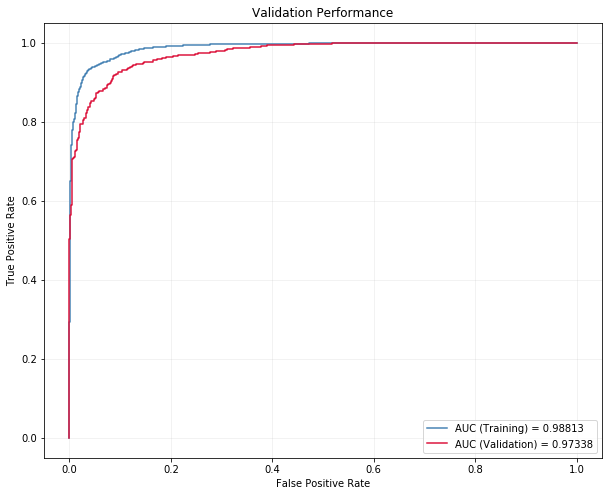

In [ ]:
# EfficientNet-B6
train_predictions = E01__train_predictions
train_labels      = E01__train_labels     
val_predictions   = E01__val_predictions  
val_labels        = E01__val_labels       

# Calculate Evaluation Metrics
M1_TPR_train, M1_FPR_train, M1_ROC_AUC_train, M1_TPR_test, M1_FPR_test, M1_ROC_AUC_test = ROC(train_predictions,train_labels,val_predictions,val_labels)
TN1, FP1, FN1, TP1                                                                      = confusion_matrix(val_labels,np.round(val_predictions)).ravel()

# Display Metrics
print("Accuracy (Training)   = %0.3f"%ACC(train_predictions,train_labels))
print("Accuracy (Validation) = %0.3f"%ACC(val_predictions,  val_labels))
print("Sensitivity: {:.3f}".format(TP1/(TP1+FN1)))
print("Specificity: {:.3f}".format(TN1/(TN1+FP1)))

plt.figure(figsize=[10,8])
plt.plot(M1_FPR_train, M1_TPR_train, lw=1.5, alpha=1.0, label="AUC (Training) = %0.5f"%M1_ROC_AUC_train,  color="steelblue")
plt.plot(M1_FPR_test,  M1_TPR_test,  lw=1.5, alpha=1.0, label="AUC (Validation) = %0.5f"%M1_ROC_AUC_test, color="crimson")
plt.title('Validation Performance')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

Accuracy (Training)   = 0.954
Accuracy (Validation) = 0.916
Sensitivity: 0.923
Specificity: 0.908


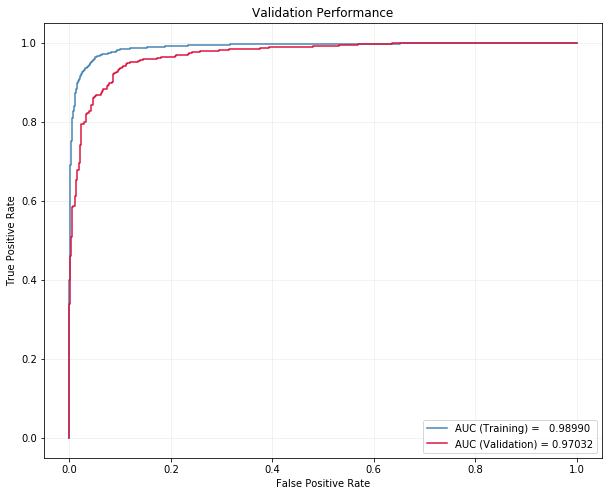

In [ ]:
# Inception-V3
train_predictions = E02__train_predictions
train_labels      = E02__train_labels     
val_predictions   = E02__val_predictions  
val_labels        = E02__val_labels       

# Calculate Evaluation Metrics
M2_TPR_train, M2_FPR_train, M2_ROC_AUC_train, M2_TPR_test, M2_FPR_test, M2_ROC_AUC_test = ROC(train_predictions,train_labels,val_predictions,val_labels)
TN2, FP2, FN2, TP2                                                                      = confusion_matrix(val_labels,np.round(val_predictions)).ravel()

# Display Metrics
print("Accuracy (Training)   = %0.3f"%ACC(train_predictions,train_labels))
print("Accuracy (Validation) = %0.3f"%ACC(val_predictions,  val_labels))
print("Sensitivity: {:.3f}".format(TP2/(TP2+FN2)))
print("Specificity: {:.3f}".format(TN2/(TN2+FP2)))

plt.figure(figsize=[10,8])
plt.plot(M2_FPR_train, M2_TPR_train, lw=1.5, alpha=1.0, label="AUC (Training) =   %0.5f"%M2_ROC_AUC_train,  color="steelblue")
plt.plot(M2_FPR_test,  M2_TPR_test,  lw=1.5, alpha=1.0, label="AUC (Validation) = %0.5f"%M2_ROC_AUC_test,   color="crimson")
plt.title('Validation Performance')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

Accuracy (Training)   = 0.932
Accuracy (Validation) = 0.904
Sensitivity: 0.912
Specificity: 0.897


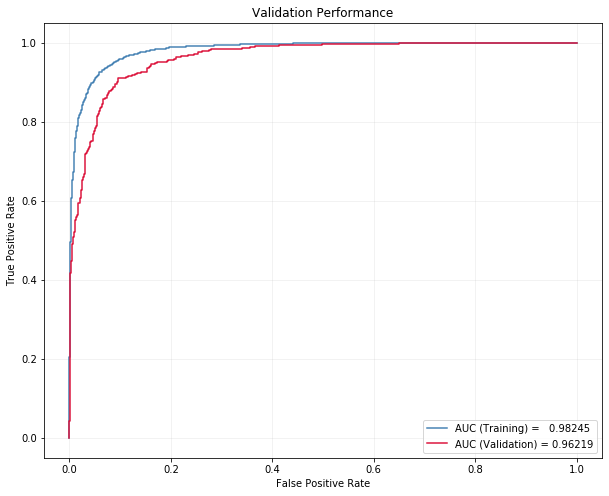

In [ ]:
# SENet-154
train_predictions = E03__train_predictions
train_labels      = E03__train_labels     
val_predictions   = E03__val_predictions  
val_labels        = E03__val_labels       

# Calculate Evaluation Metrics
M3_TPR_train, M3_FPR_train, M3_ROC_AUC_train, M3_TPR_test, M3_FPR_test, M3_ROC_AUC_test = ROC(train_predictions,train_labels,val_predictions,val_labels)
TN3, FP3, FN3, TP3                                                                      = confusion_matrix(val_labels,np.round(val_predictions)).ravel()

# Display Metrics
print("Accuracy (Training)   = %0.3f"%ACC(train_predictions,train_labels))
print("Accuracy (Validation) = %0.3f"%ACC(val_predictions,  val_labels))
print("Sensitivity: {:.3f}".format(TP3/(TP3+FN3)))
print("Specificity: {:.3f}".format(TN3/(TN3+FP3)))

plt.figure(figsize=[10,8])
plt.plot(M3_FPR_train, M3_TPR_train, lw=1.5, alpha=1.0, label="AUC (Training) =   %0.5f"%M3_ROC_AUC_train,  color="steelblue")
plt.plot(M3_FPR_test,  M3_TPR_test,  lw=1.5, alpha=1.0, label="AUC (Validation) = %0.5f"%M3_ROC_AUC_test,   color="crimson")
plt.title('Validation Performance')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

Accuracy (Training)   = 0.959
Accuracy (Validation) = 0.907
Sensitivity: 0.895
Specificity: 0.918


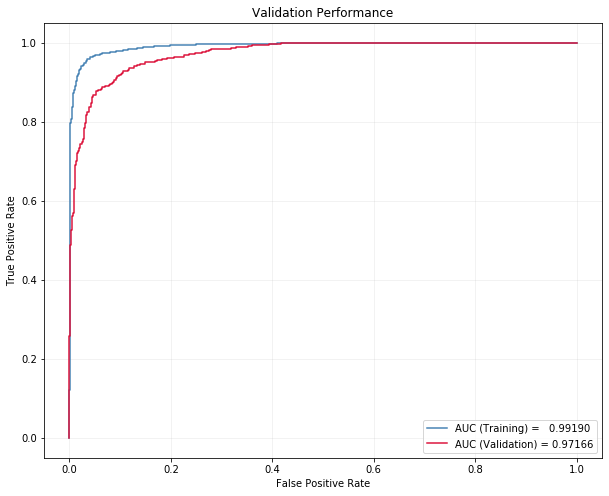

In [ ]:
# SEResNeXt-101
train_predictions = E04__train_predictions
train_labels      = E04__train_labels     
val_predictions   = E04__val_predictions  
val_labels        = E04__val_labels       

# Calculate Evaluation Metrics
M4_TPR_train, M4_FPR_train, M4_ROC_AUC_train, M4_TPR_test, M4_FPR_test, M4_ROC_AUC_test = ROC(train_predictions,train_labels,val_predictions,val_labels)
TN4, FP4, FN4, TP4                                                                      = confusion_matrix(val_labels,np.round(val_predictions)).ravel()

# Display Metrics
print("Accuracy (Training)   = %0.3f"%ACC(train_predictions,train_labels))
print("Accuracy (Validation) = %0.3f"%ACC(val_predictions,  val_labels))
print("Sensitivity: {:.3f}".format(TP4/(TP4+FN4)))
print("Specificity: {:.3f}".format(TN4/(TN4+FP4)))

plt.figure(figsize=[10,8])
plt.plot(M4_FPR_train, M4_TPR_train, lw=1.5, alpha=1.0, label="AUC (Training) =   %0.5f"%M4_ROC_AUC_train,  color="steelblue")
plt.plot(M4_FPR_test,  M4_TPR_test,  lw=1.5, alpha=1.0, label="AUC (Validation) = %0.5f"%M4_ROC_AUC_test,   color="crimson")
plt.title('Validation Performance')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

Accuracy (Training)   = 0.990
Accuracy (Validation) = 0.902
Sensitivity: 0.895
Specificity: 0.918


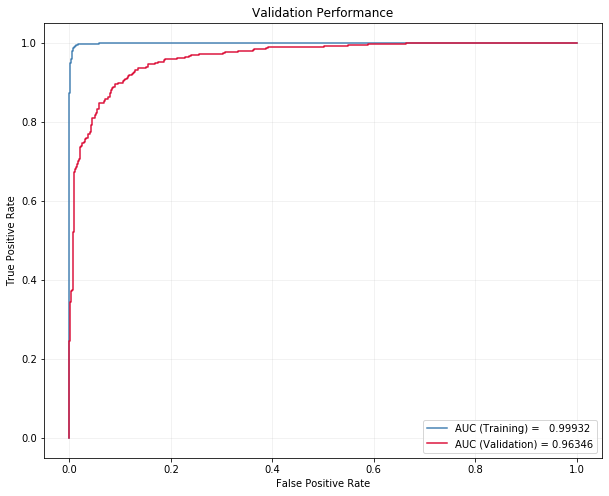

In [ ]:
# EfficientNet-B4
train_predictions = E05__train_predictions
train_labels      = E05__train_labels     
val_predictions   = E05__val_predictions  
val_labels        = E05__val_labels       

# Calculate Evaluation Metrics
M5_TPR_train, M5_FPR_train, M5_ROC_AUC_train, M5_TPR_test, M5_FPR_test, M5_ROC_AUC_test = ROC(train_predictions,train_labels,val_predictions,val_labels)
TN5, FP5, FN5, TP5                                                                      = confusion_matrix(val_labels,np.round(val_predictions)).ravel()

# Display Metrics
print("Accuracy (Training)   = %0.3f"%ACC(train_predictions,train_labels))
print("Accuracy (Validation) = %0.3f"%ACC(val_predictions,  val_labels))
print("Sensitivity: {:.3f}".format(TP4/(TP5+FN5)))
print("Specificity: {:.3f}".format(TN4/(TN5+FP5)))

plt.figure(figsize=[10,8])
plt.plot(M5_FPR_train, M5_TPR_train, lw=1.5, alpha=1.0, label="AUC (Training) =   %0.5f"%M5_ROC_AUC_train,  color="steelblue")
plt.plot(M5_FPR_test,  M5_TPR_test,  lw=1.5, alpha=1.0, label="AUC (Validation) = %0.5f"%M5_ROC_AUC_test,   color="crimson")
plt.title('Validation Performance')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

Accuracy (Training)   = 0.936
Accuracy (Validation) = 0.903
Sensitivity: 0.910
Specificity: 0.897


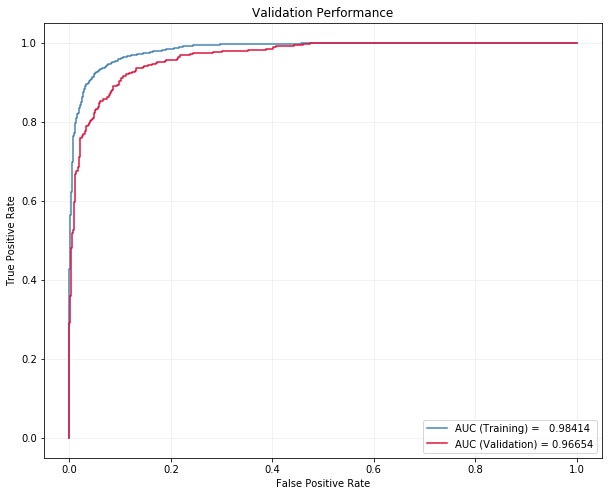

In [ ]:
# DenseNet-169
train_predictions = E06__train_predictions
train_labels      = E06__train_labels     
val_predictions   = E06__val_predictions  
val_labels        = E06__val_labels       

# Calculate Evaluation Metrics
M6_TPR_train, M6_FPR_train, M6_ROC_AUC_train, M6_TPR_test, M6_FPR_test, M6_ROC_AUC_test = ROC(train_predictions,train_labels,val_predictions,val_labels)
TN6, FP6, FN6, TP6                                                                      = confusion_matrix(val_labels,np.round(val_predictions)).ravel()

# Display Metrics
print("Accuracy (Training)   = %0.3f"%ACC(train_predictions,train_labels))
print("Accuracy (Validation) = %0.3f"%ACC(val_predictions,  val_labels))
print("Sensitivity: {:.3f}".format(TP6/(TP6+FN6)))
print("Specificity: {:.3f}".format(TN6/(TN6+FP6)))

plt.figure(figsize=[10,8])
plt.plot(M6_FPR_train, M6_TPR_train, lw=1.5, alpha=1.0, label="AUC (Training) =   %0.5f"%M6_ROC_AUC_train,  color="steelblue")
plt.plot(M6_FPR_test,  M6_TPR_test,  lw=1.5, alpha=1.0, label="AUC (Validation) = %0.5f"%M6_ROC_AUC_test,   color="crimson")
plt.title('Validation Performance')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

Accuracy (Training)   = 0.966
Accuracy (Validation) = 0.907
Sensitivity: 0.862
Specificity: 0.952


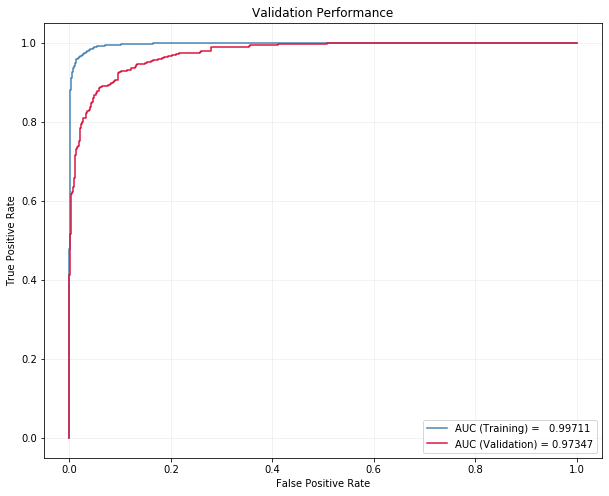

In [ ]:
# EfficientNet-B6
train_predictions = E07__train_predictions
train_labels      = E07__train_labels     
val_predictions   = E07__val_predictions  
val_labels        = E07__val_labels       

# Calculate Evaluation Metrics
M7_TPR_train, M7_FPR_train, M7_ROC_AUC_train, M7_TPR_test, M7_FPR_test, M7_ROC_AUC_test = ROC(train_predictions,train_labels,val_predictions,val_labels)
TN7, FP7, FN7, TP7                                                                      = confusion_matrix(val_labels,np.round(val_predictions)).ravel()

# Display Metrics
print("Accuracy (Training)   = %0.3f"%ACC(train_predictions,train_labels))
print("Accuracy (Validation) = %0.3f"%ACC(val_predictions,  val_labels))
print("Sensitivity: {:.3f}".format(TP7/(TP7+FN7)))
print("Specificity: {:.3f}".format(TN7/(TN7+FP7)))

plt.figure(figsize=[10,8])
plt.plot(M7_FPR_train, M7_TPR_train, lw=1.5, alpha=1.0, label="AUC (Training) =   %0.5f"%M7_ROC_AUC_train,  color="steelblue")
plt.plot(M7_FPR_test,  M7_TPR_test,  lw=1.5, alpha=1.0, label="AUC (Validation) = %0.5f"%M7_ROC_AUC_test,   color="crimson")
plt.title('Validation Performance')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

# **Ensemble Model**

## **● Ensemble Performance**

Employing Average Prediction Aggregation.
Ensemble Accuracy (Training) = 0.969
Ensemble Accuracy (Validation) = 0.933
Ensemble Sensitivity: 0.932
Ensemble Specificity: 0.935


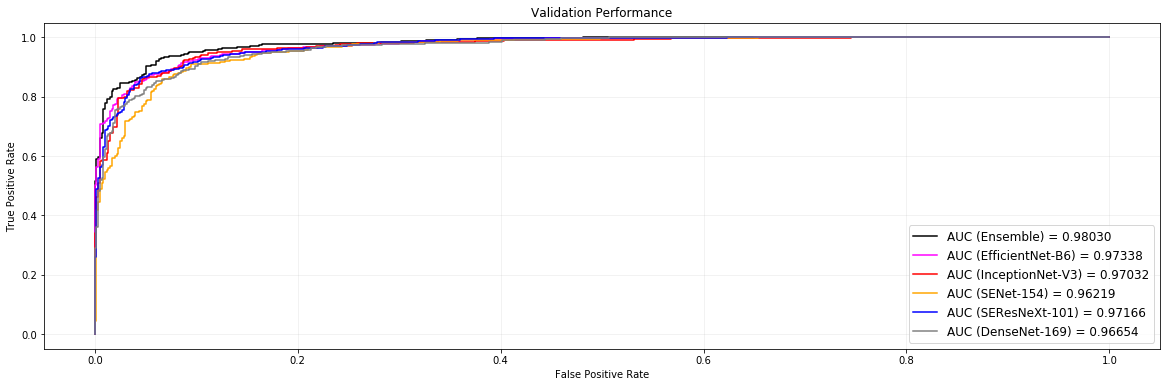

In [ ]:
# Ensemble Model
ENSEMBLE_MODE     = 'mean'                     # ('mean'/'maxconf')
val_labels        = E01__val_labels  
train_labels      = E01__train_labels    

if (ENSEMBLE_MODE=='mean'):
  # Average Predictions For Each Sample
  print('Employing Average Prediction Aggregation.')
  val_predictions   = (E01__val_predictions + E02__val_predictions + E03__val_predictions + 
                       E04__val_predictions + E06__val_predictions)/5

  train_predictions = (E01__train_predictions + E02__train_predictions + E03__train_predictions + 
                       E04__train_predictions + E06__train_predictions)/5


elif (ENSEMBLE_MODE=='maxconf'):
  print('Employing Max Confidence Prediction Aggregation.')
  val_predictions        = np.zeros(shape=E01__val_predictions.shape)

  # Aggregate Predictions into Single Matrix and Determine Max Confidence Prediction
  all_val_predictions    = np.concatenate((E01__val_predictions, E02__val_predictions,
                                           E03__val_predictions, E04__val_predictions,
                                           E05__val_predictions, E06__val_predictions,
                                           E07__val_predictions),axis=1)
  maxconf_val_arg        = np.argmax((abs(0.5-all_val_predictions)),   axis=1)

  for i in range(len(E01__val_predictions)):
    val_predictions[i,0]        = all_val_predictions[i,maxconf_val_arg[i]]


# Calculate Evaluation Metrics
E_TPR_train, E_FPR_train, E_ROC_AUC_train, E_TPR_test, E_FPR_test, E_ROC_AUC_test = ROC(train_predictions,train_labels,val_predictions,val_labels)
TNE, FPE, FNE, TPE                                                                = confusion_matrix(val_labels,np.round(val_predictions)).ravel()

# Display Metrics
print("Ensemble Accuracy (Training) = %0.3f"%ACC(train_predictions,  train_labels))
print("Ensemble Accuracy (Validation) = %0.3f"%ACC(val_predictions,  val_labels))
print("Ensemble Sensitivity: {:.3f}".format(TPE/(TPE+FNE)))
print("Ensemble Specificity: {:.3f}".format(TNE/(TNE+FPE)))

plt.figure(figsize=[20,6])
plt.plot(E_FPR_test,  E_TPR_test,  lw=1.5, alpha=1.0, label="AUC (Ensemble) = %0.5f"%E_ROC_AUC_test,         color="black")
plt.plot(M1_FPR_test, M1_TPR_test, lw=1.5, alpha=1.0, label="AUC (EfficientNet-B6) = %0.5f"%M1_ROC_AUC_test, color="magenta")
plt.plot(M2_FPR_test, M2_TPR_test, lw=1.5, alpha=1.0, label="AUC (InceptionNet-V3) = %0.5f"%M2_ROC_AUC_test, color="red")
plt.plot(M3_FPR_test, M3_TPR_test, lw=1.5, alpha=1.0, label="AUC (SENet-154) = %0.5f"%M3_ROC_AUC_test,       color="orange")
plt.plot(M4_FPR_test, M4_TPR_test, lw=1.5, alpha=1.0, label="AUC (SEResNeXt-101) = %0.5f"%M4_ROC_AUC_test,   color="blue")
#plt.plot(M5_FPR_test, M5_TPR_test, lw=1.5, alpha=1.0, label="AUC (EfficientNet-B4) = %0.5f"%M5_ROC_AUC_test, color="green")
plt.plot(M6_FPR_test, M6_TPR_test, lw=1.5, alpha=1.0, label="AUC (DenseNet-169) = %0.5f"%M6_ROC_AUC_test,    color="gray")
#plt.plot(M7_FPR_test, M7_TPR_test, lw=1.5, alpha=1.0, label="AUC (EfficientNet-B6) = %0.5f"%M7_ROC_AUC_test, color="purple")
plt.title('Validation Performance')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right", prop={'size': 12})
plt.grid(alpha=0.2)